# import libabries

In [ ]:
! pip install hazm==0.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.7/316.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 63.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 33.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394472 sha256=ab57267be65e6d5502fbb8c3c2c36e1c4d00ca9526cb73679578ff7cdadc5738
  Stored in directory: /root/.cache/pip/wheels/6b/6d/14/3defa4cd7013faeddf715150696f4a96d7725c87700eb8a68e
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp310-cp310-linux_x86_64.whl size=179248 sha256=70b315183c4bca7d38f5e5e7446425e45bd343c4d91e3729cb7ca0b4d65fc005
  Stored in directory: /root/.cache/pip/wheels/9f/cb/30/fef48ecac051e433987eccdb5682900b4c00d44a4bcd4d4ec8
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Suc

In [ ]:
import gdown
gdown.download(id='1ViHBOU4WyYzIGNpfjewxwesa7Dn-Edp_')
gdown.download(id='156KELVr_LtK8UiDDCf0U3H5uf-NPFBMa')
gdown.download(id='1IYF7LeOBnl6H7EBf7mvabXd8G4sGeyKp')

Downloading...
From: https://drive.google.com/uc?id=1ViHBOU4WyYzIGNpfjewxwesa7Dn-Edp_
To: /content/train_data.csv
100%|██████████| 28.1M/28.1M [00:00<00:00, 87.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=156KELVr_LtK8UiDDCf0U3H5uf-NPFBMa
To: /content/eval_data.csv
100%|██████████| 5.92M/5.92M [00:00<00:00, 93.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IYF7LeOBnl6H7EBf7mvabXd8G4sGeyKp
To: /content/test_data.csv
100%|██████████| 5.93M/5.93M [00:00<00:00, 92.6MB/s]


'test_data.csv'

In [ ]:
from hazm import *
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score,precision_score , roc_auc_score, make_scorer
import math
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import AdamW
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
import json
from copy import deepcopy
import numpy as np
import random
import re
import string
import codecs
from shutil import copyfile
label_encoder = preprocessing.LabelEncoder()

# load pre-processed data

In [ ]:
import ast

In [ ]:
def X(df):
  list_ = []
  for _, data in df.iterrows():
    if str(data['tags']) == 'nan':
      keywords = ''
    else:
      keywords = ast.literal_eval(data['tags'])
      keywords = ','.join(keywords)
    list_.append(data['title'] + ' , ' + keywords + ' , ' + data['text'])
  df['concat_all'] = list_
  return df

In [ ]:
random.seed(12345)
train = pd.read_csv('/content/train_data.csv')
train = train.loc[:, ~train.columns.str.contains('^Unnamed')]
eval = pd.read_csv('/content/eval_data.csv')
eval = eval.loc[:, ~eval.columns.str.contains('^Unnamed')]
test = pd.read_csv('/content/test_data.csv')
test = test.loc[:, ~test.columns.str.contains('^Unnamed')]

train = X(train)
eval = X(eval)
test = X(test)


frames = [train, eval]
train = pd.concat(frames)

print(train.shape)
train.head(10)

(6688, 6)


,link,title,text,tags,last_sentiment,concat_all
0,https://www.khabaronline.ir/news/1686919/این-و...,این ورزش سیاسی است!,ریحانه اسکندری: علی‌رغم این که سیاست‌مداران جه...,"['مدیریت ورزشی', 'تنیس', 'بسکتبال', 'کاراته', ...",0,"این ورزش سیاسی است! , مدیریت ورزشی,تنیس,بسکتبا..."
1,https://www.tabnak.ir/fa/news/1164909/جزئیات-ن...,جزئیات نشست غیرعلنی امروز مجلس/آیا اولویت ، مو...,تابناک _ دلهره و اضطراب مردم از نابسامانی بازا...,"['مجلس شورای اسلامی', 'نمایندگان مجلس', 'مجلس ...",0,جزئیات نشست غیرعلنی امروز مجلس/آیا اولویت ، مو...
2,https://www.hamshahrionline.ir/news/745272/کاه...,کاهش قیمت طلا و سکه در بازار؛ سکه طرح قدیم چند...,به گزارش همشهری آنلاین، امروز سه شنبه ۹ اسفند ...,"['خبر مهم', 'قیمت طلا و فلزات گرانبها - ایران'...",0,کاهش قیمت طلا و سکه در بازار؛ سکه طرح قدیم چند...
3,https://www.khabaronline.ir/news/1585196/عراق-...,عراق غرامت کامل جنگ کویت را پرداخت کرد,به نقل از شبکه الجزیره، بانک مرکزی عراق در بیا...,"['کویت', 'عراق']",0,"عراق غرامت کامل جنگ کویت را پرداخت کرد , کویت,..."
4,https://www.khabaronline.ir/news/1554372/جزئیا...,جزئیات توافق ایران و آژانس/پاسخ به دعوت طالبان...,به گزارش خبرآنلاین، نشست خبری سخنگوی وزارت امو...,['سعيد خطيب زاده'],0,جزئیات توافق ایران و آژانس/پاسخ به دعوت طالبان...
5,https://www.khabaronline.ir/news/1745946/روایت...,روایت همسر امام از روزی که تندروها می خواستند ...,مسر امام خمینی، بانو خدیجه ثقفی در خاطرات خود ...,"['امام خمینی', 'تاریخ انقلاب']",0,روایت همسر امام از روزی که تندروها می خواستند ...
6,https://www.tabnak.ir/fa/news/1166220/اینکه-من...,اینکه منشا حوادث اخیر مدارس مشخص نشده، رعب آور...,تابناک _ آیت الله جوادی آملی مشخص نشدن منشا مس...,"['آیت الله جوادی آملی', 'مسمومیت\u200c', 'مدارس']",0,اینکه منشا حوادث اخیر مدارس مشخص نشده، رعب آور...
7,https://www.hamshahrionline.ir/news/721666/آما...,آمار هولناک مرگ بر اثر گازگرفتگی در سال جاری |...,به گزارش همشهری آنلاین، سازمان پزشکی قانونی گز...,"['پزشکی قانونی', 'گاز گرفتگی', 'حوادث ایران']",0,آمار هولناک مرگ بر اثر گازگرفتگی در سال جاری |...
8,https://fararu.com/fa/news/538101/ویدئو-سریلان...,(ویدئو) سریلانکا سوگوار مرگ مقدس‌ترین فیل,قرار است برای این فیل مراسم تشییع جنازه دولتی ...,"['فیل', 'سریلانکا', 'حیات وحش']",0,"(ویدئو) سریلانکا سوگوار مرگ مقدس‌ترین فیل , فی..."
9,https://www.khabaronline.ir/news/1727964/کیهان...,کیهان: کسانی که جشنواره فیلم فجر را تحریم کرده...,از ویژگی‌های مثبت این جشنواره افزایش فیلم‌های ...,"['روزنامه کیهان', 'جشنواره فیلم فجر']",0,کیهان: کسانی که جشنواره فیلم فجر را تحریم کرده...


# vectorization

In [ ]:
random.seed(12345)

# tf-idf vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
def tfidf(data, ngrams=(1, 2)):
    tfidf_vectorizer = TfidfVectorizer(ngram_range=ngrams)
    vectors = tfidf_vectorizer.fit_transform(data)

    return vectors, tfidf_vectorizer

# bow vectorization
from sklearn.feature_extraction.text import CountVectorizer
def bow(data, ngrams=(1, 2)):
    bow_vectorizer = CountVectorizer(ngram_range=ngrams)
    vectors = bow_vectorizer.fit_transform(data)

    return vectors, bow_vectorizer

In [ ]:
train_tfidf, tfidf_vectorizer = tfidf(train["concat_all"])
# eval_tfidf = tfidf_vectorizer.transform(eval["text"])
test_tfidf = tfidf_vectorizer.transform(test["concat_all"])

In [ ]:
train

,link,title,text,tags,last_sentiment,concat_all
0,https://www.khabaronline.ir/news/1686919/این-و...,این ورزش سیاسی است!,ریحانه اسکندری: علی‌رغم این که سیاست‌مداران جه...,"['مدیریت ورزشی', 'تنیس', 'بسکتبال', 'کاراته', ...",0,"این ورزش سیاسی است! , مدیریت ورزشی,تنیس,بسکتبا..."
1,https://www.tabnak.ir/fa/news/1164909/جزئیات-ن...,جزئیات نشست غیرعلنی امروز مجلس/آیا اولویت ، مو...,تابناک _ دلهره و اضطراب مردم از نابسامانی بازا...,"['مجلس شورای اسلامی', 'نمایندگان مجلس', 'مجلس ...",0,جزئیات نشست غیرعلنی امروز مجلس/آیا اولویت ، مو...
2,https://www.hamshahrionline.ir/news/745272/کاه...,کاهش قیمت طلا و سکه در بازار؛ سکه طرح قدیم چند...,به گزارش همشهری آنلاین، امروز سه شنبه ۹ اسفند ...,"['خبر مهم', 'قیمت طلا و فلزات گرانبها - ایران'...",0,کاهش قیمت طلا و سکه در بازار؛ سکه طرح قدیم چند...
3,https://www.khabaronline.ir/news/1585196/عراق-...,عراق غرامت کامل جنگ کویت را پرداخت کرد,به نقل از شبکه الجزیره، بانک مرکزی عراق در بیا...,"['کویت', 'عراق']",0,"عراق غرامت کامل جنگ کویت را پرداخت کرد , کویت,..."
4,https://www.khabaronline.ir/news/1554372/جزئیا...,جزئیات توافق ایران و آژانس/پاسخ به دعوت طالبان...,به گزارش خبرآنلاین، نشست خبری سخنگوی وزارت امو...,['سعيد خطيب زاده'],0,جزئیات توافق ایران و آژانس/پاسخ به دعوت طالبان...
...,...,...,...,...,...,...
1175,https://www.khabaronline.ir/news/1561998/انفجا...,انفجار مهیب در مسجد شیعیان در قندوز افغانستان,به گزارش روزنامه اطلاعات افغانستان؛ در این انف...,"['انفجار', 'افغانستان ']",0,انفجار مهیب در مسجد شیعیان در قندوز افغانستان ...
1176,https://fararu.com/fa/news/563610/رمزگشایی-از-...,رمزگشایی از یک راز سر به مُهرِ جنگ اوکراین,فرارو-نشریه «اکونومیست» در گزارشی ضمن پرداختن ...,"['جنگ اوکراین', 'پوتین', 'تلفات روسیه در جنگ ا...",0,"رمزگشایی از یک راز سر به مُهرِ جنگ اوکراین , ج..."
1177,https://www.mehrnews.com/news/5670917/حضور-رئی...,حضور رئیس قوه قضائیه در گلزار شهدای کرمان,به گزارش خبرنگار مهر، رئیس قوه قضائیه بامداد د...,"['کرمان', 'قوه قضاییه', 'غلامحسین محسنی اژه ای...",0,"حضور رئیس قوه قضائیه در گلزار شهدای کرمان , کر..."
1178,https://www.hamshahrionline.ir/news/734049/متر...,مترو در این روز برای زنان رایگان است,به گزارش همشهری آنلاین، مریم اردبیلی با بیان ا...,"['تهران', 'مترو تهران', 'زنان', 'مادر']",0,"مترو در این روز برای زنان رایگان است , تهران,م..."


In [ ]:
train_bow, bow_vectorizer = bow(train["concat_all"])
# eval_bow = bow_vectorizer.transform(eval["text"])
test_bow = bow_vectorizer.transform(test["concat_all"])

In [ ]:
X_train_tfidf = train_tfidf
y_train_tfidf = train["last_sentiment"].values

# X_eval_tfidf = eval_tfidf
# y_eval_tfidf = eval["tag"].values

X_test_tfidf = test_tfidf
y_test_tfidf = test["last_sentiment"].values

In [ ]:
X_train_bow = train_bow
y_train_bow = train["last_sentiment"].values

# X_eval_bow = eval_bow
# y_eval_bow = eval["tag"].values

X_test_bow = test_bow
y_test_bow = test["last_sentiment"].values

# evaluation metrics

In [ ]:
# a function to print evaluation using given predicted labels and real labels
random.seed(12345)
import seaborn as sns
def print_evaluation(real, pred):
    f1macro = f1_score(real, pred, average= 'macro')
    f1micro = f1_score(real, pred, average='micro')
    acc = accuracy_score(real, pred)
    recall = recall_score(real, pred, average= 'macro', zero_division=0) #zero_division=1
    precision = precision_score(real, pred, average= 'macro') #,zero_division=1
    rocauc = roc_auc_score(real, pred, average= 'macro')
    confmat = confusion_matrix(real, pred)
    print(f'f1-score macro: {f1macro}')
    print(f'f1-score micro: {f1micro}')
    print(f'accuracy score: {acc}')
    print(f'recall score: {recall}')
    print(f'precision score: {precision}')
    print(f'ROCAUC score: {rocauc}')
    fig, ax = plt.subplots()
    sns.heatmap(confmat, xticklabels=['not importnt','important'] , yticklabels=['not importnt','important'], annot=True, cmap='hot')
    ax.set_xlabel( "Predicted label")
    ax.set_ylabel( "True label")
    ax.set_title( "Confusion Matrix")

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

## tf-idf

In [ ]:
# logistic regression model tuning
random.seed(12345)
lrm_param_grid = {'C': [0.01, 0.1, 1, 10],
                  'class_weight':[{0:0.15, 1:1},{0:0.3, 1:1},{0:0.2, 1:3},{0:0.15, 1:5}, {0:0.63, 1:2.3}],
                  'solver': ['newton-cg', 'lbfgs']}
lrm_grid = GridSearchCV(LogisticRegression(),
                        lrm_param_grid,
                        refit=True,
                        verbose=3,
                        scoring='f1_macro')

In [ ]:
lrm_grid.fit(X_train_tfidf,y_train_tfidf)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 1}, solver=newton-cg;, score=0.174 total time=   2.7s
[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 1}, solver=newton-cg;, score=0.174 total time=   2.1s
[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 1}, solver=newton-cg;, score=0.174 total time=   2.2s
[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 1}, solver=newton-cg;, score=0.174 total time=   2.1s
[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 1}, solver=newton-cg;, score=0.174 total time=   1.7s
[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 1}, solver=lbfgs;, score=0.174 total time=   5.3s
[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 1}, solver=lbfgs;, score=0.174 total time=   4.2s
[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 1}, solver=lbfgs;, score=0.174 total time=   4.7s
[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 1}, solver=lbfgs;, score=0.174 total time=   4.8s
[CV 5/5] END C=0.01, class_weight={0: 0.15, 1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=10, class_weight={0: 0.2, 1: 3}, solver=lbfgs;, score=0.715 total time=  34.2s
[CV 3/5] END C=10, class_weight={0: 0.2, 1: 3}, solver=lbfgs;, score=0.701 total time=  32.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=10, class_weight={0: 0.2, 1: 3}, solver=lbfgs;, score=0.706 total time=  35.1s
[CV 5/5] END C=10, class_weight={0: 0.2, 1: 3}, solver=lbfgs;, score=0.707 total time=  32.8s
[CV 1/5] END C=10, class_weight={0: 0.15, 1: 5}, solver=newton-cg;, score=0.666 total time=  11.3s
[CV 2/5] END C=10, class_weight={0: 0.15, 1: 5}, solver=newton-cg;, score=0.636 total time=  11.6s
[CV 3/5] END C=10, class_weight={0: 0.15, 1: 5}, solver=newton-cg;, score=0.646 total time=  11.5s
[CV 4/5] END C=10, class_weight={0: 0.15, 1: 5}, solver=newton-cg;, score=0.634 total time=  10.2s
[CV 5/5] END C=10, class_weight={0: 0.15, 1: 5}, solver=newton-cg;, score=0.635 total time=  11.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 5}, solver=lbfgs;, score=0.666 total time=  33.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 5}, solver=lbfgs;, score=0.636 total time=  35.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 5}, solver=lbfgs;, score=0.646 total time=  33.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 5}, solver=lbfgs;, score=0.634 total time=  34.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 5}, solver=lbfgs;, score=0.635 total time=  33.5s
[CV 1/5] END C=10, class_weight={0: 0.63, 1: 2.3}, solver=newton-cg;, score=0.762 total time=   9.4s
[CV 2/5] END C=10, class_weight={0: 0.63, 1: 2.3}, solver=newton-cg;, score=0.748 total time=  11.2s
[CV 3/5] END C=10, class_weight={0: 0.63, 1: 2.3}, solver=newton-cg;, score=0.718 total time=   9.7s
[CV 4/5] END C=10, class_weight={0: 0.63, 1: 2.3}, solver=newton-cg;, score=0.747 total time=  11.2s
[CV 5/5] END C=10, class_weight={0: 0.63, 1: 2.3}, solver=newton-cg;, score=0.737 total time=  11.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=10, class_weight={0: 0.63, 1: 2.3}, solver=lbfgs;, score=0.762 total time=  33.6s
[CV 2/5] END C=10, class_weight={0: 0.63, 1: 2.3}, solver=lbfgs;, score=0.748 total time=  28.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=10, class_weight={0: 0.63, 1: 2.3}, solver=lbfgs;, score=0.718 total time=  33.2s
[CV 4/5] END C=10, class_weight={0: 0.63, 1: 2.3}, solver=lbfgs;, score=0.747 total time=  28.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=10, class_weight={0: 0.63, 1: 2.3}, solver=lbfgs;, score=0.737 total time=  39.7s


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'class_weight': [{0: 0.15, 1: 1}, {0: 0.3, 1: 1},
                                          {0: 0.2, 1: 3}, {0: 0.15, 1: 5},
                                          {0: 0.63, 1: 2.3}],
                         'solver': ['newton-cg', 'lbfgs']},
             scoring='f1_macro', verbose=3)

In [ ]:
# best parameter for model
lrm_grid.best_params_

{'C': 10, 'class_weight': {0: 0.3, 1: 1}, 'solver': 'newton-cg'}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


f1-score macro: 0.7345678409146431
f1-score micro: 0.8441998306519899
accuracy score: 0.8441998306519899
recall score: 0.7492567077592458
precision score: 0.7229602001575315
ROCAUC score: 0.7492567077592458


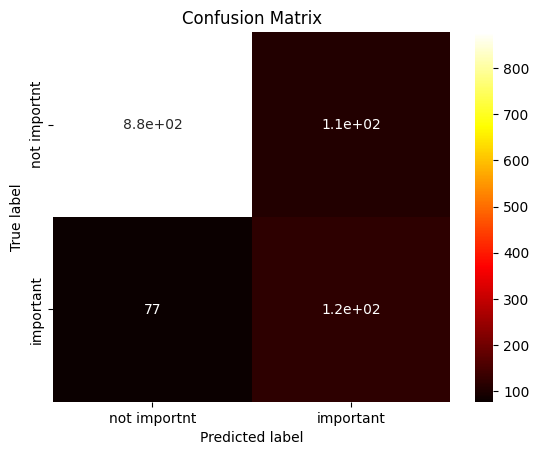

In [ ]:
random.seed(12345)
lr_tfidf = LogisticRegression(C=10, class_weight={0: 0.3, 1: 1}, solver='newton-cg')
lr_tfidf.fit(X_train_tfidf, y_train_tfidf)
y_pred_tfidf = lr_tfidf.predict(X_test_tfidf)
print_evaluation(y_test_tfidf, y_pred_tfidf)

In [ ]:
import pickle
# save
with open("LR_model.pkl", "wb") as f:
    pickle.dump(lr_tfidf, f)

NameError: ignored

## bow

In [ ]:
lrm_grid.fit(X_train_bow,y_train_bow)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 1}, solver=newton-cg;, score=0.739 total time=  28.0s
[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 1}, solver=newton-cg;, score=0.710 total time=  30.4s
[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 1}, solver=newton-cg;, score=0.700 total time=  31.1s
[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 1}, solver=newton-cg;, score=0.695 total time=  31.6s
[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 1}, solver=newton-cg;, score=0.704 total time=  29.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 1}, solver=lbfgs;, score=0.739 total time=  36.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 1}, solver=lbfgs;, score=0.706 total time=  36.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 1}, solver=lbfgs;, score=0.699 total time=  37.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 1}, solver=lbfgs;, score=0.695 total time=  36.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 1}, solver=lbfgs;, score=0.703 total time=  36.1s
[CV 1/5] END C=0.01, class_weight={0: 0.3, 1: 1}, solver=newton-cg;, score=0.774 total time=  36.6s
[CV 2/5] END C=0.01, class_weight={0: 0.3, 1: 1}, solver=newton-cg;, score=0.733 total time=  32.5s
[CV 3/5] END C=0.01, class_weight={0: 0.3, 1: 1}, solver=newton-cg;, score=0.702 total time=  30.7s
[CV 4/5] END C=0.01, class_weight={0: 0.3, 1: 1}, solver=newton-cg;, score=0.735 total time=  33.6s
[CV 5/5] END C=0.01, class_weight={0: 0.3, 1: 1}, solver=newton-cg;, score=0.739 total time=  35.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=0.01, class_weight={0: 0.3, 1: 1}, solver=lbfgs;, score=0.774 total time=  35.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=0.01, class_weight={0: 0.3, 1: 1}, solver=lbfgs;, score=0.733 total time=  36.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=0.01, class_weight={0: 0.3, 1: 1}, solver=lbfgs;, score=0.702 total time=  36.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=0.01, class_weight={0: 0.3, 1: 1}, solver=lbfgs;, score=0.735 total time=  34.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=0.01, class_weight={0: 0.3, 1: 1}, solver=lbfgs;, score=0.739 total time=  34.4s
[CV 1/5] END C=0.01, class_weight={0: 0.2, 1: 3}, solver=newton-cg;, score=0.686 total time=  28.8s
[CV 2/5] END C=0.01, class_weight={0: 0.2, 1: 3}, solver=newton-cg;, score=0.651 total time=  30.5s
[CV 3/5] END C=0.01, class_weight={0: 0.2, 1: 3}, solver=newton-cg;, score=0.648 total time=  29.9s
[CV 4/5] END C=0.01, class_weight={0: 0.2, 1: 3}, solver=newton-cg;, score=0.666 total time=  33.6s
[CV 5/5] END C=0.01, class_weight={0: 0.2, 1: 3}, solver=newton-cg;, score=0.663 total time=  31.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=0.01, class_weight={0: 0.2, 1: 3}, solver=lbfgs;, score=0.685 total time=  34.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=0.01, class_weight={0: 0.2, 1: 3}, solver=lbfgs;, score=0.651 total time=  35.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=0.01, class_weight={0: 0.2, 1: 3}, solver=lbfgs;, score=0.648 total time=  35.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=0.01, class_weight={0: 0.2, 1: 3}, solver=lbfgs;, score=0.665 total time=  35.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=0.01, class_weight={0: 0.2, 1: 3}, solver=lbfgs;, score=0.662 total time=  35.5s
[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 5}, solver=newton-cg;, score=0.596 total time=  33.8s
[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 5}, solver=newton-cg;, score=0.576 total time=  31.8s
[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 5}, solver=newton-cg;, score=0.576 total time=  35.1s
[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 5}, solver=newton-cg;, score=0.588 total time=  33.8s
[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 5}, solver=newton-cg;, score=0.570 total time=  35.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 5}, solver=lbfgs;, score=0.601 total time=  35.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 5}, solver=lbfgs;, score=0.577 total time=  37.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 5}, solver=lbfgs;, score=0.577 total time=  36.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 5}, solver=lbfgs;, score=0.594 total time=  36.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 5}, solver=lbfgs;, score=0.572 total time=  35.7s
[CV 1/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, solver=newton-cg;, score=0.775 total time=  34.6s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 2/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, solver=newton-cg;, score=0.697 total time=   4.3s
[CV 3/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, solver=newton-cg;, score=0.716 total time=  36.7s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 4/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, solver=newton-cg;, score=0.684 total time=   5.0s
[CV 5/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, solver=newton-cg;, score=0.737 total time=  38.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, solver=lbfgs;, score=0.778 total time=  35.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, solver=lbfgs;, score=0.733 total time=  35.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, solver=lbfgs;, score=0.717 total time=  36.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, solver=lbfgs;, score=0.736 total time=  36.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, solver=lbfgs;, score=0.740 total time=  35.5s
[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 1}, solver=newton-cg;, score=0.775 total time=  38.4s
[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 1}, solver=newton-cg;, score=0.729 total time=  39.6s
[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 1}, solver=newton-cg;, score=0.717 total time=  35.6s
[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 1}, solver=newton-cg;, score=0.724 total time=  42.6s
[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 1}, solver=newton-cg;, score=0.736 total time=  38.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 1}, solver=lbfgs;, score=0.777 total time=  35.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 1}, solver=lbfgs;, score=0.726 total time=  34.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 1}, solver=lbfgs;, score=0.725 total time=  35.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 1}, solver=lbfgs;, score=0.716 total time=  35.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 1}, solver=lbfgs;, score=0.741 total time=  36.3s
[CV 1/5] END C=0.1, class_weight={0: 0.3, 1: 1}, solver=newton-cg;, score=0.768 total time=  43.6s
[CV 2/5] END C=0.1, class_weight={0: 0.3, 1: 1}, solver=newton-cg;, score=0.729 total time=  42.8s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/5] END C=0.1, class_weight={0: 0.3, 1: 1}, solver=newton-cg;, score=0.691 total time=   7.1s
[CV 4/5] END C=0.1, class_weight={0: 0.3, 1: 1}, solver=newton-cg;, score=0.742 total time=  46.9s
[CV 5/5] END C=0.1, class_weight={0: 0.3, 1: 1}, solver=newton-cg;, score=0.739 total time=  47.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=0.1, class_weight={0: 0.3, 1: 1}, solver=lbfgs;, score=0.762 total time=  35.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=0.1, class_weight={0: 0.3, 1: 1}, solver=lbfgs;, score=0.726 total time=  35.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=0.1, class_weight={0: 0.3, 1: 1}, solver=lbfgs;, score=0.702 total time=  35.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=0.1, class_weight={0: 0.3, 1: 1}, solver=lbfgs;, score=0.736 total time=  35.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=0.1, class_weight={0: 0.3, 1: 1}, solver=lbfgs;, score=0.738 total time=  35.5s
[CV 1/5] END C=0.1, class_weight={0: 0.2, 1: 3}, solver=newton-cg;, score=0.758 total time=  40.7s
[CV 2/5] END C=0.1, class_weight={0: 0.2, 1: 3}, solver=newton-cg;, score=0.724 total time=  47.8s
[CV 3/5] END C=0.1, class_weight={0: 0.2, 1: 3}, solver=newton-cg;, score=0.719 total time=  48.5s
[CV 4/5] END C=0.1, class_weight={0: 0.2, 1: 3}, solver=newton-cg;, score=0.722 total time= 1.0min
[CV 5/5] END C=0.1, class_weight={0: 0.2, 1: 3}, solver=newton-cg;, score=0.729 total time=  55.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=0.1, class_weight={0: 0.2, 1: 3}, solver=lbfgs;, score=0.760 total time=  35.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=0.1, class_weight={0: 0.2, 1: 3}, solver=lbfgs;, score=0.725 total time=  35.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=0.1, class_weight={0: 0.2, 1: 3}, solver=lbfgs;, score=0.718 total time=  36.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=0.1, class_weight={0: 0.2, 1: 3}, solver=lbfgs;, score=0.717 total time=  35.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=0.1, class_weight={0: 0.2, 1: 3}, solver=lbfgs;, score=0.737 total time=  35.6s
[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 5}, solver=newton-cg;, score=0.744 total time=  47.1s
[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 5}, solver=newton-cg;, score=0.701 total time=  49.3s
[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 5}, solver=newton-cg;, score=0.712 total time=  47.3s
[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 5}, solver=newton-cg;, score=0.706 total time=  53.5s
[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 5}, solver=newton-cg;, score=0.713 total time=  47.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 5}, solver=lbfgs;, score=0.741 total time=  36.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 5}, solver=lbfgs;, score=0.702 total time=  35.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 5}, solver=lbfgs;, score=0.716 total time=  36.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 5}, solver=lbfgs;, score=0.699 total time=  36.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 5}, solver=lbfgs;, score=0.711 total time=  36.0s
[CV 1/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, solver=newton-cg;, score=0.766 total time=  50.6s
[CV 2/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, solver=newton-cg;, score=0.729 total time= 1.0min


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, solver=newton-cg;, score=0.684 total time=   9.4s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 4/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, solver=newton-cg;, score=0.687 total time=   9.5s
[CV 5/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, solver=newton-cg;, score=0.735 total time=  44.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, solver=lbfgs;, score=0.757 total time=  36.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, solver=lbfgs;, score=0.728 total time=  35.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, solver=lbfgs;, score=0.699 total time=  35.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, solver=lbfgs;, score=0.730 total time=  36.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, solver=lbfgs;, score=0.740 total time=  35.9s
[CV 1/5] END C=1, class_weight={0: 0.15, 1: 1}, solver=newton-cg;, score=0.760 total time=  44.5s
[CV 2/5] END C=1, class_weight={0: 0.15, 1: 1}, solver=newton-cg;, score=0.725 total time=  53.2s
[CV 3/5] END C=1, class_weight={0: 0.15, 1: 1}, solver=newton-cg;, score=0.702 total time=  45.7s
[CV 4/5] END C=1, class_weight={0: 0.15, 1: 1}, solver=newton-cg;, score=0.732 total time=  49.0s
[CV 5/5] END C=1, class_weight={0: 0.15, 1: 1}, solver=newton-cg;, score=0.734 total time=  48.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 1}, solver=lbfgs;, score=0.758 total time=  34.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 1}, solver=lbfgs;, score=0.723 total time=  35.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 1}, solver=lbfgs;, score=0.705 total time=  37.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 1}, solver=lbfgs;, score=0.727 total time=  36.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 1}, solver=lbfgs;, score=0.748 total time=  36.0s
[CV 1/5] END C=1, class_weight={0: 0.3, 1: 1}, solver=newton-cg;, score=0.759 total time=  41.9s
[CV 2/5] END C=1, class_weight={0: 0.3, 1: 1}, solver=newton-cg;, score=0.727 total time=  50.5s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/5] END C=1, class_weight={0: 0.3, 1: 1}, solver=newton-cg;, score=0.691 total time=  12.6s
[CV 4/5] END C=1, class_weight={0: 0.3, 1: 1}, solver=newton-cg;, score=0.733 total time=  47.8s
[CV 5/5] END C=1, class_weight={0: 0.3, 1: 1}, solver=newton-cg;, score=0.732 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=1, class_weight={0: 0.3, 1: 1}, solver=lbfgs;, score=0.756 total time=  36.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=1, class_weight={0: 0.3, 1: 1}, solver=lbfgs;, score=0.729 total time=  36.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=1, class_weight={0: 0.3, 1: 1}, solver=lbfgs;, score=0.692 total time=  37.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=1, class_weight={0: 0.3, 1: 1}, solver=lbfgs;, score=0.731 total time=  36.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=1, class_weight={0: 0.3, 1: 1}, solver=lbfgs;, score=0.739 total time=  35.3s
[CV 1/5] END C=1, class_weight={0: 0.2, 1: 3}, solver=newton-cg;, score=0.768 total time=  50.8s
[CV 2/5] END C=1, class_weight={0: 0.2, 1: 3}, solver=newton-cg;, score=0.721 total time=  56.3s
[CV 3/5] END C=1, class_weight={0: 0.2, 1: 3}, solver=newton-cg;, score=0.713 total time= 1.4min
[CV 4/5] END C=1, class_weight={0: 0.2, 1: 3}, solver=newton-cg;, score=0.727 total time= 1.7min
[CV 5/5] END C=1, class_weight={0: 0.2, 1: 3}, solver=newton-cg;, score=0.734 total time= 1.2min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=1, class_weight={0: 0.2, 1: 3}, solver=lbfgs;, score=0.751 total time=  34.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=1, class_weight={0: 0.2, 1: 3}, solver=lbfgs;, score=0.727 total time=  37.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=1, class_weight={0: 0.2, 1: 3}, solver=lbfgs;, score=0.720 total time=  36.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=1, class_weight={0: 0.2, 1: 3}, solver=lbfgs;, score=0.726 total time=  35.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=1, class_weight={0: 0.2, 1: 3}, solver=lbfgs;, score=0.744 total time=  34.5s
[CV 1/5] END C=1, class_weight={0: 0.15, 1: 5}, solver=newton-cg;, score=0.771 total time=  51.4s
[CV 2/5] END C=1, class_weight={0: 0.15, 1: 5}, solver=newton-cg;, score=0.722 total time=  51.8s
[CV 3/5] END C=1, class_weight={0: 0.15, 1: 5}, solver=newton-cg;, score=0.716 total time=  56.6s
[CV 4/5] END C=1, class_weight={0: 0.15, 1: 5}, solver=newton-cg;, score=0.722 total time=  55.8s
[CV 5/5] END C=1, class_weight={0: 0.15, 1: 5}, solver=newton-cg;, score=0.735 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 5}, solver=lbfgs;, score=0.766 total time=  36.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 5}, solver=lbfgs;, score=0.732 total time=  35.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 5}, solver=lbfgs;, score=0.720 total time=  35.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 5}, solver=lbfgs;, score=0.727 total time=  35.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 5}, solver=lbfgs;, score=0.742 total time=  36.5s
[CV 1/5] END C=1, class_weight={0: 0.63, 1: 2.3}, solver=newton-cg;, score=0.759 total time=  50.1s
[CV 2/5] END C=1, class_weight={0: 0.63, 1: 2.3}, solver=newton-cg;, score=0.730 total time=  55.2s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/5] END C=1, class_weight={0: 0.63, 1: 2.3}, solver=newton-cg;, score=0.685 total time=  13.0s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 4/5] END C=1, class_weight={0: 0.63, 1: 2.3}, solver=newton-cg;, score=0.684 total time=  14.5s
[CV 5/5] END C=1, class_weight={0: 0.63, 1: 2.3}, solver=newton-cg;, score=0.727 total time=  56.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=1, class_weight={0: 0.63, 1: 2.3}, solver=lbfgs;, score=0.759 total time=  35.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=1, class_weight={0: 0.63, 1: 2.3}, solver=lbfgs;, score=0.731 total time=  35.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=1, class_weight={0: 0.63, 1: 2.3}, solver=lbfgs;, score=0.713 total time=  35.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=1, class_weight={0: 0.63, 1: 2.3}, solver=lbfgs;, score=0.731 total time=  35.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=1, class_weight={0: 0.63, 1: 2.3}, solver=lbfgs;, score=0.742 total time=  36.2s
[CV 1/5] END C=10, class_weight={0: 0.15, 1: 1}, solver=newton-cg;, score=0.760 total time= 1.0min
[CV 2/5] END C=10, class_weight={0: 0.15, 1: 1}, solver=newton-cg;, score=0.732 total time= 1.3min
[CV 3/5] END C=10, class_weight={0: 0.15, 1: 1}, solver=newton-cg;, score=0.707 total time=  57.6s
[CV 4/5] END C=10, class_weight={0: 0.15, 1: 1}, solver=newton-cg;, score=0.728 total time= 1.0min
[CV 5/5] END C=10, class_weight={0: 0.15, 1: 1}, solver=newton-cg;, score=0.730 total time=  52.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 1}, solver=lbfgs;, score=0.754 total time=  35.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 1}, solver=lbfgs;, score=0.734 total time=  35.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 1}, solver=lbfgs;, score=0.710 total time=  37.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 1}, solver=lbfgs;, score=0.723 total time=  35.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 1}, solver=lbfgs;, score=0.747 total time=  34.8s
[CV 1/5] END C=10, class_weight={0: 0.3, 1: 1}, solver=newton-cg;, score=0.754 total time=  53.3s
[CV 2/5] END C=10, class_weight={0: 0.3, 1: 1}, solver=newton-cg;, score=0.725 total time= 1.0min


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/5] END C=10, class_weight={0: 0.3, 1: 1}, solver=newton-cg;, score=0.691 total time=  16.1s
[CV 4/5] END C=10, class_weight={0: 0.3, 1: 1}, solver=newton-cg;, score=0.733 total time=  54.3s
[CV 5/5] END C=10, class_weight={0: 0.3, 1: 1}, solver=newton-cg;, score=0.719 total time= 1.4min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=10, class_weight={0: 0.3, 1: 1}, solver=lbfgs;, score=0.750 total time=  36.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=10, class_weight={0: 0.3, 1: 1}, solver=lbfgs;, score=0.722 total time=  36.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=10, class_weight={0: 0.3, 1: 1}, solver=lbfgs;, score=0.707 total time=  36.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=10, class_weight={0: 0.3, 1: 1}, solver=lbfgs;, score=0.728 total time=  37.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=10, class_weight={0: 0.3, 1: 1}, solver=lbfgs;, score=0.751 total time=  36.9s
[CV 1/5] END C=10, class_weight={0: 0.2, 1: 3}, solver=newton-cg;, score=0.757 total time= 1.0min
[CV 2/5] END C=10, class_weight={0: 0.2, 1: 3}, solver=newton-cg;, score=0.729 total time= 1.0min
[CV 3/5] END C=10, class_weight={0: 0.2, 1: 3}, solver=newton-cg;, score=0.699 total time= 1.9min
[CV 4/5] END C=10, class_weight={0: 0.2, 1: 3}, solver=newton-cg;, score=0.729 total time= 1.7min
[CV 5/5] END C=10, class_weight={0: 0.2, 1: 3}, solver=newton-cg;, score=0.727 total time= 1.5min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=10, class_weight={0: 0.2, 1: 3}, solver=lbfgs;, score=0.750 total time=  36.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=10, class_weight={0: 0.2, 1: 3}, solver=lbfgs;, score=0.737 total time=  36.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=10, class_weight={0: 0.2, 1: 3}, solver=lbfgs;, score=0.723 total time=  36.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=10, class_weight={0: 0.2, 1: 3}, solver=lbfgs;, score=0.732 total time=  38.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=10, class_weight={0: 0.2, 1: 3}, solver=lbfgs;, score=0.750 total time=  37.4s
[CV 1/5] END C=10, class_weight={0: 0.15, 1: 5}, solver=newton-cg;, score=0.763 total time= 1.0min
[CV 2/5] END C=10, class_weight={0: 0.15, 1: 5}, solver=newton-cg;, score=0.718 total time= 1.0min
[CV 3/5] END C=10, class_weight={0: 0.15, 1: 5}, solver=newton-cg;, score=0.704 total time= 1.6min
[CV 4/5] END C=10, class_weight={0: 0.15, 1: 5}, solver=newton-cg;, score=0.725 total time= 1.1min
[CV 5/5] END C=10, class_weight={0: 0.15, 1: 5}, solver=newton-cg;, score=0.728 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 5}, solver=lbfgs;, score=0.751 total time=  35.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 5}, solver=lbfgs;, score=0.718 total time=  37.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 5}, solver=lbfgs;, score=0.716 total time=  36.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 5}, solver=lbfgs;, score=0.724 total time=  38.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 5}, solver=lbfgs;, score=0.741 total time=  36.4s
[CV 1/5] END C=10, class_weight={0: 0.63, 1: 2.3}, solver=newton-cg;, score=0.753 total time=  58.4s
[CV 2/5] END C=10, class_weight={0: 0.63, 1: 2.3}, solver=newton-cg;, score=0.725 total time= 1.3min


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/5] END C=10, class_weight={0: 0.63, 1: 2.3}, solver=newton-cg;, score=0.683 total time=  17.8s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 4/5] END C=10, class_weight={0: 0.63, 1: 2.3}, solver=newton-cg;, score=0.686 total time=  18.4s
[CV 5/5] END C=10, class_weight={0: 0.63, 1: 2.3}, solver=newton-cg;, score=0.717 total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=10, class_weight={0: 0.63, 1: 2.3}, solver=lbfgs;, score=0.763 total time=  35.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=10, class_weight={0: 0.63, 1: 2.3}, solver=lbfgs;, score=0.718 total time=  38.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=10, class_weight={0: 0.63, 1: 2.3}, solver=lbfgs;, score=0.708 total time=  36.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=10, class_weight={0: 0.63, 1: 2.3}, solver=lbfgs;, score=0.728 total time=  36.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=10, class_weight={0: 0.63, 1: 2.3}, solver=lbfgs;, score=0.742 total time=  39.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'class_weight': [{0: 0.15, 1: 1}, {0: 0.3, 1: 1},
                                          {0: 0.2, 1: 3}, {0: 0.15, 1: 5},
                                          {0: 0.63, 1: 2.3}],
                         'solver': ['newton-cg', 'lbfgs']},
             scoring='f1_macro', verbose=3)

In [ ]:
lrm_grid.best_params_

NameError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


f1-score macro: 0.7087334763018964
f1-score micro: 0.8331922099915327
accuracy score: 0.8331922099915327
recall score: 0.7160934424531233
precision score: 0.7023386877740271
ROCAUC score: 0.7160934424531233


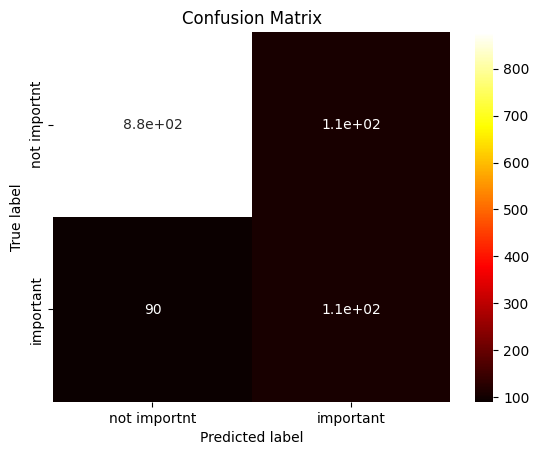

In [ ]:
random.seed(12345)
model_bow = LogisticRegression(C=0.1, class_weight={0: 0.63, 1: 2.3}, solver='lbfgs')
model_bow.fit(X_train_bow, y_train_bow)
y_pred_bow = model_bow.predict(X_test_bow)
print_evaluation(y_test_bow, y_pred_bow)

# Naive Bayes

In [ ]:
from sklearn import naive_bayes

In [ ]:
nb_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
nb_grid = GridSearchCV(naive_bayes.MultinomialNB(),
                        nb_param_grid,
                        refit=True,
                        verbose=3,
                        scoring='f1_macro')

## tf-idf

In [ ]:
nb_grid.fit(X_train_tfidf,y_train_tfidf)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ........................alpha=0.01;, score=0.690 total time=   0.2s
[CV 2/5] END ........................alpha=0.01;, score=0.685 total time=   0.2s
[CV 3/5] END ........................alpha=0.01;, score=0.673 total time=   0.2s
[CV 4/5] END ........................alpha=0.01;, score=0.668 total time=   0.2s
[CV 5/5] END ........................alpha=0.01;, score=0.686 total time=   0.3s
[CV 1/5] END .........................alpha=0.1;, score=0.494 total time=   0.3s
[CV 2/5] END .........................alpha=0.1;, score=0.484 total time=   0.3s
[CV 3/5] END .........................alpha=0.1;, score=0.491 total time=   0.3s
[CV 4/5] END .........................alpha=0.1;, score=0.511 total time=   0.3s
[CV 5/5] END .........................alpha=0.1;, score=0.516 total time=   0.3s
[CV 1/5] END ...........................alpha=1;, score=0.441 total time=   0.2s
[CV 2/5] END ...........................alpha=1;,

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 1, 10]}, scoring='f1_macro',
             verbose=3)

In [ ]:
nb_grid.best_params_

{'alpha': 0.01}

f1-score macro: 0.7189449720157812
f1-score micro: 0.859441151566469
accuracy score: 0.859441151566469
recall score: 0.6991349839428157
precision score: 0.7485935984481087
ROCAUC score: 0.6991349839428157


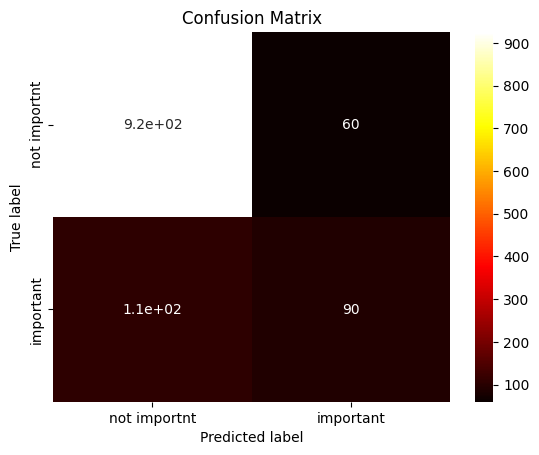

In [ ]:
random.seed(12345)
Naive_tfidf = naive_bayes.MultinomialNB(alpha=0.01)
Naive_tfidf.fit(X_train_tfidf, y_train_tfidf)
predictions_NB_tfidf = Naive_tfidf.predict(X_test_tfidf)
print_evaluation(y_test_tfidf, predictions_NB_tfidf)

## bow

In [ ]:
nb_grid.fit(X_train_bow,y_train_bow)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ........................alpha=0.01;, score=0.718 total time=   0.2s
[CV 2/5] END ........................alpha=0.01;, score=0.693 total time=   0.2s
[CV 3/5] END ........................alpha=0.01;, score=0.701 total time=   0.2s
[CV 4/5] END ........................alpha=0.01;, score=0.694 total time=   0.2s
[CV 5/5] END ........................alpha=0.01;, score=0.708 total time=   0.2s
[CV 1/5] END .........................alpha=0.1;, score=0.651 total time=   0.2s
[CV 2/5] END .........................alpha=0.1;, score=0.664 total time=   0.2s
[CV 3/5] END .........................alpha=0.1;, score=0.631 total time=   0.2s
[CV 4/5] END .........................alpha=0.1;, score=0.632 total time=   0.2s
[CV 5/5] END .........................alpha=0.1;, score=0.641 total time=   0.2s
[CV 1/5] END ...........................alpha=1;, score=0.702 total time=   0.2s
[CV 2/5] END ...........................alpha=1;,

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 1, 10]}, scoring='f1_macro',
             verbose=3)

In [ ]:
nb_grid.best_params_

{'alpha': 0.01}

f1-score macro: 0.7079658522225494
f1-score micro: 0.8399661303979679
accuracy score: 0.8399661303979679
recall score: 0.7058505127939501
precision score: 0.7101724046750225
ROCAUC score: 0.7058505127939501


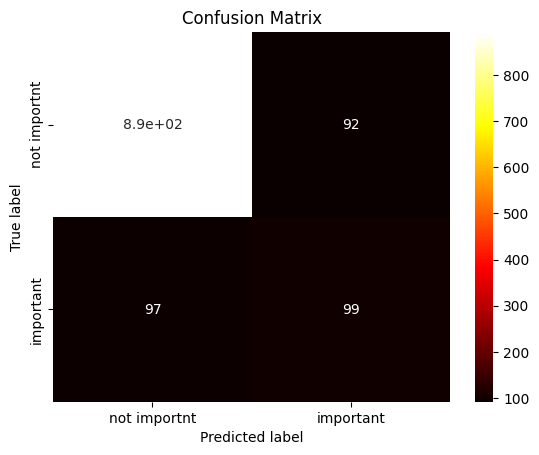

In [ ]:
random.seed(12345)
Naive_bow = naive_bayes.MultinomialNB(alpha=0.01)
Naive_bow.fit(X_train_bow, y_train_bow)
predictions_NB_bow = Naive_bow.predict(X_test_bow)
print_evaluation(y_test_bow, predictions_NB_bow)

# SVM

In [ ]:
from sklearn import svm

In [ ]:
svm_param_grid = {'C': [0.01, 0.1, 1, 10],
                  'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                  'degree': [2,3],
                  'class_weight':[{0:0.15, 1:1},{0:0.3, 1:1},{0:0.2, 1:3},{0:0.15, 1:5}, {0:0.63, 1:2.3}]}
svm_grid = GridSearchCV(svm.SVC(max_iter=100),
                        svm_param_grid,
                        refit=True,
                        verbose=3,
                        scoring='f1_macro')

## tf-idf

In [ ]:
svm_grid.fit(X_train_tfidf,y_train_tfidf)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.174 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.174 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.174 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.174 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.174 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.174 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.174 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.174 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.174 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.174 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.174 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.174 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.174 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.174 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.174 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.174 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.174 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.174 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.174 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.174 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.174 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.174 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.174 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.174 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.174 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.174 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.174 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.174 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.174 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.174 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.174 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.174 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.174 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.174 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.174 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.174 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.174 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.174 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.174 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.174 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.174 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.174 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.174 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.174 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.174 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.174 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.174 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.174 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.174 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.174 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.174 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.174 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.174 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.174 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.174 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.174 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.174 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.174 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.174 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.174 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.174 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.174 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.174 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.174 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.174 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.174 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.174 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.174 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.174 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.174 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.174 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.174 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.174 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.174 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.174 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.174 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.174 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.174 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.174 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.174 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.174 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.174 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.174 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.174 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.174 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.174 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.174 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.174 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.174 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.174 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.174 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.174 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.174 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.174 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.174 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.174 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.174 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.174 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.174 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.174 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.174 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.174 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.174 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.174 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.174 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.174 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.174 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.298 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.234 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.376 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.399 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.292 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.263 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.376 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.428 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.539 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.285 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.331 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.403 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.284 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.346 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.294 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.175 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.177 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.176 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.175 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.298 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.234 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.376 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.399 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.292 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.283 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.385 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.613 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.251 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.250 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.331 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.403 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.284 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.346 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.294 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.175 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.177 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.176 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.175 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.586 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.569 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.585 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.568 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.580 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.476 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.419 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.545 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.404 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.304 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.453 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.572 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.593 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.534 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.578 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.378 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.533 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.484 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.427 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.459 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.586 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.569 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.585 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.568 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.580 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.622 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.586 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.541 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.512 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.604 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.453 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.572 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.593 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.534 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.578 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.378 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.533 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.484 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.427 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.459 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.402 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.504 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.530 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.529 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.468 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.269 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.584 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.380 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.292 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.377 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.529 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.565 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.425 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.560 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.566 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.220 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.228 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.241 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.230 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.231 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.402 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.504 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.530 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.529 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.468 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.385 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.618 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.541 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.527 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.553 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.529 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.565 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.425 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.560 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.566 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.220 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.228 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.241 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.230 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.231 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.298 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.234 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.376 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.399 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.292 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.263 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.376 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.428 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.539 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.285 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.331 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.403 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.284 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.346 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.294 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.175 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.174 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.177 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.176 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.175 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.298 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.234 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.376 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.399 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.292 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.283 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.385 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.613 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.251 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.250 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.331 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.403 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.284 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.346 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.294 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.175 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.174 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.177 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.176 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.175 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.637 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.571 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.573 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.595 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.573 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.616 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.583 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.545 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.572 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.557 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.584 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.595 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.593 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.597 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.529 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.523 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.606 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.586 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.590 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.583 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.637 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.571 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.573 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.595 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.573 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.540 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.560 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.541 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.504 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.599 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.584 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.595 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.593 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.597 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.529 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.523 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.606 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.586 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.590 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.583 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(estimator=SVC(max_iter=100),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'class_weight': [{0: 0.15, 1: 1}, {0: 0.3, 1: 1},
                                          {0: 0.2, 1: 3}, {0: 0.15, 1: 5},
                                          {0: 0.63, 1: 2.3}],
                         'degree': [2, 3],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1_macro', verbose=3)

In [ ]:
svm_grid.best_params_

{'C': 10, 'class_weight': {0: 0.63, 1: 2.3}, 'degree': 2, 'kernel': 'linear'}

f1-score macro: 0.708688672416791
f1-score micro: 0.8450465707027942
accuracy score: 0.8450465707027942
recall score: 0.7007225732932767
precision score: 0.7180627771400274
ROCAUC score: 0.7007225732932767


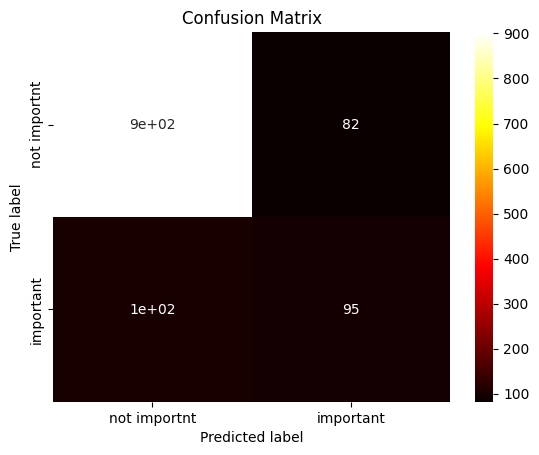

In [ ]:
random.seed(12345)
svm_tfidf = svm.SVC(C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel='linear')
svm_tfidf.fit(X_train_tfidf, y_train_tfidf)
predictions_svm_tfidf = svm_tfidf.predict(X_test_tfidf)
print_evaluation(y_test_tfidf, predictions_svm_tfidf)

## bow

In [ ]:
svm_grid.fit(X_train_bow,y_train_bow)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.400 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.255 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.288 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.382 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.378 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.441 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.441 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.441 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.441 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.441 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.441 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.400 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.255 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.288 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.382 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.378 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.174 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.441 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.441 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.441 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.441 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.441 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.441 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.342 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.296 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.264 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.301 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.337 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.441 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.441 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.441 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.441 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.441 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.441 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.441 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.342 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.296 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.264 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.301 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.337 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.441 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.441 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.441 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.441 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.441 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.441 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.441 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.391 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.288 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.284 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.295 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.315 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.174 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.467 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.445 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.456 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.441 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.441 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.441 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.441 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.441 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.391 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.288 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.284 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.295 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.315 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.460 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.482 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.494 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.472 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.441 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.441 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.441 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.441 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.441 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.441 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.400 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.255 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.288 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.382 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.378 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.174 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.174 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.174 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.174 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.174 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.400 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.255 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.288 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.382 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.378 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.175 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.174 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.174 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.175 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.174 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.322 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.294 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.289 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.282 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.323 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.441 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.441 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.441 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.441 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.441 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.441 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.441 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.441 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.441 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.441 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.441 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.322 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.294 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.289 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.282 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.323 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.441 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.441 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.441 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.441 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.441 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.441 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.441 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.441 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.441 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.359 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.296 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.307 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.350 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.318 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.441 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.441 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.441 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.441 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.441 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.441 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.359 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.296 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.307 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.350 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.318 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.175 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.441 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.441 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.441 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.441 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.441 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.516 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.296 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.307 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.350 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.306 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.441 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.441 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.441 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.441 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.441 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.441 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.516 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.296 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.307 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.350 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.306 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.441 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.441 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.441 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.441 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.441 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.441 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.441 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.516 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.296 total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.307 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.350 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.306 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.176 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.467 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.445 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.456 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.441 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.441 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.508 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.444 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.441 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.516 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.296 total time=   7.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.307 total time=   7.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.350 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.306 total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.460 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.482 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.494 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.472 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.441 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.441 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.508 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.444 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.441 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.359 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.296 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.307 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.350 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.318 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.174 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.174 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.174 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.174 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.174 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.303 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.236 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.202 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.236 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.266 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.359 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.296 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.307 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.350 total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.318 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.178 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.174 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.176 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.174 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.179 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.303 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.236 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.202 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.236 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.266 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.516 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.296 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.307 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.350 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.306 total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.441 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.441 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.441 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.441 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.441 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.441 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.500 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.441 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.496 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.441 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.516 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.296 total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.307 total time=   7.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.350 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.306 total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.441 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.441 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.441 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.441 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.441 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.441 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.500 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.441 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.496 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.441 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.516 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.296 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.307 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.350 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.306 total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.444 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.369 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.410 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.452 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.445 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.521 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.528 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.497 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.521 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.516 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.296 total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.307 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.350 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.306 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.444 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.369 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.410 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.174 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.452 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.445 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.521 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.528 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.497 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.521 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.516 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.296 total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.307 total time=   7.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.350 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.306 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.441 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.441 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.441 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.441 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.536 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.527 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.516 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.511 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.526 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.516 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.296 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.307 total time=   7.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.350 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.306 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.441 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.441 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.441 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.441 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.441 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.536 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.527 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.516 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.511 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.526 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.516 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.296 total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.307 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.350 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.306 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.226 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.467 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.445 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.456 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.174 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.521 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.505 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.478 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.492 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.503 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.516 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.296 total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.307 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.350 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.306 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.460 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.482 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.494 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.472 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.174 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.521 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.505 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.478 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.492 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.503 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.516 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.296 total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.307 total time=   7.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.350 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.306 total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.184 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.182 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.176 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.174 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.176 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.174 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.403 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.367 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.367 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.368 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.345 total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.516 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.296 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.307 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.350 total time=   7.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.306 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.203 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.183 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.197 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.177 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.220 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.174 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.403 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.367 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.367 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.368 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.345 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.516 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.296 total time=   7.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.307 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.350 total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.306 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.441 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.441 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.441 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.441 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.441 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.441 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.467 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.526 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.530 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.503 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.525 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.516 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.296 total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.307 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.350 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.306 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.441 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.441 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.441 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.441 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.467 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.526 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.530 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.503 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.525 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.516 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.296 total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.307 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.350 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=linear;, score=0.306 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.452 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.364 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.350 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.380 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.395 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=rbf;, score=0.338 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.549 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.513 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.533 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.496 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=2, kernel=sigmoid;, score=0.528 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.516 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.296 total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.307 total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.350 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=linear;, score=0.306 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.364 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.350 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.380 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.395 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=rbf;, score=0.338 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.549 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.513 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.533 total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.496 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 1}, degree=3, kernel=sigmoid;, score=0.528 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.516 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.296 total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.307 total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.350 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=linear;, score=0.306 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=poly;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.409 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.406 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.392 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.429 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=rbf;, score=0.364 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.538 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.528 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.537 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.500 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=2, kernel=sigmoid;, score=0.523 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.516 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.296 total time=   7.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.307 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.350 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=linear;, score=0.306 total time=   7.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=poly;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.409 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.406 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.392 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.429 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=rbf;, score=0.364 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.538 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.528 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.537 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.500 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.3, 1: 1}, degree=3, kernel=sigmoid;, score=0.523 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.516 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.296 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.307 total time=   7.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.350 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=linear;, score=0.306 total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.242 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.242 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.224 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.236 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=poly;, score=0.203 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.374 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.376 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.366 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.380 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=rbf;, score=0.348 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.324 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.354 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.262 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.377 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=2, kernel=sigmoid;, score=0.259 total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.516 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.296 total time=   7.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.307 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.350 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=linear;, score=0.306 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.230 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.225 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.219 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.221 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=poly;, score=0.179 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.374 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.376 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.366 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.380 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=rbf;, score=0.348 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.324 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.354 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.262 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.377 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.2, 1: 3}, degree=3, kernel=sigmoid;, score=0.259 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.516 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.296 total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.307 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.350 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=linear;, score=0.306 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.240 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.257 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.254 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.230 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=poly;, score=0.210 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.364 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.344 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.354 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.373 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=rbf;, score=0.313 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.412 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.377 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.342 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.383 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=2, kernel=sigmoid;, score=0.355 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.516 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.296 total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.307 total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.350 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=linear;, score=0.306 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.241 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.250 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.218 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.220 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=poly;, score=0.441 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.364 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.344 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.354 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.373 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=rbf;, score=0.313 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.412 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.377 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.342 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.383 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.15, 1: 5}, degree=3, kernel=sigmoid;, score=0.355 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.516 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.296 total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.307 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.350 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=linear;, score=0.306 total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.441 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=poly;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.427 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.416 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.417 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.428 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=rbf;, score=0.431 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.526 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.529 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.503 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.506 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=2, kernel=sigmoid;, score=0.524 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.516 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.296 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.307 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.350 total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=linear;, score=0.306 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.441 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.441 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.441 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.441 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=poly;, score=0.441 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.427 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.416 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.417 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.428 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=rbf;, score=0.431 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.526 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.529 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.503 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.506 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight={0: 0.63, 1: 2.3}, degree=3, kernel=sigmoid;, score=0.524 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(estimator=SVC(max_iter=100),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'class_weight': [{0: 0.15, 1: 1}, {0: 0.3, 1: 1},
                                          {0: 0.2, 1: 3}, {0: 0.15, 1: 5},
                                          {0: 0.63, 1: 2.3}],
                         'degree': [2, 3],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1_macro', verbose=3)

In [ ]:
svm_grid.best_params_

{'C': 10, 'class_weight': {0: 0.3, 1: 1}, 'degree': 2, 'kernel': 'sigmoid'}

f1-score macro: 0.4649118540722215
f1-score micro: 0.550381033022862
accuracy score: 0.550381033022862
recall score: 0.5118123899305915
precision score: 0.5066548190169369
ROCAUC score: 0.5118123899305915


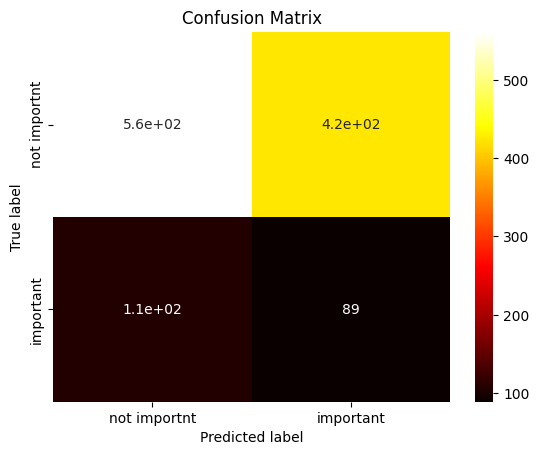

In [ ]:
svm_bow = svm.SVC(C=1, class_weight={0: 0.3, 1: 1}, degree=2, kernel='sigmoid')
svm_bow.fit(X_train_bow, y_train_bow)
predictions_svm_bow = svm_bow.predict(X_test_bow)
print_evaluation(y_test_bow, predictions_svm_bow)

# Decision Tree

In [ ]:
from sklearn import tree
dt_param_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1,2,3],
                  'class_weight':[{0:0.15, 1:1},{0:0.3, 1:1},{0:0.2, 1:3},{0:0.15, 1:5}, {0:0.63, 1:2.3}]}
dt_grid = GridSearchCV(tree.DecisionTreeClassifier(),
                        dt_param_grid,
                        refit=True,
                        verbose=3,
                        scoring='f1_macro')

## tf-idf

In [ ]:
dt_grid.fit(X_train_tfidf,y_train_tfidf)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END class_weight={0: 0.15, 1: 1}, criterion=gini, max_depth=1, splitter=best;, score=0.277 total time=   7.6s
[CV 2/5] END class_weight={0: 0.15, 1: 1}, criterion=gini, max_depth=1, splitter=best;, score=0.265 total time=   8.6s
[CV 3/5] END class_weight={0: 0.15, 1: 1}, criterion=gini, max_depth=1, splitter=best;, score=0.295 total time=   8.6s
[CV 4/5] END class_weight={0: 0.15, 1: 1}, criterion=gini, max_depth=1, splitter=best;, score=0.277 total time=   7.7s
[CV 5/5] END class_weight={0: 0.15, 1: 1}, criterion=gini, max_depth=1, splitter=best;, score=0.260 total time=   8.6s
[CV 1/5] END class_weight={0: 0.15, 1: 1}, criterion=gini, max_depth=1, splitter=random;, score=0.174 total time=   8.3s
[CV 2/5] END class_weight={0: 0.15, 1: 1}, criterion=gini, max_depth=1, splitter=random;, score=0.238 total time=   7.3s
[CV 3/5] END class_weight={0: 0.15, 1: 1}, criterion=gini, max_depth=1, splitter=random;, score=0.174

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [{0: 0.15, 1: 1}, {0: 0.3, 1: 1},
                                          {0: 0.2, 1: 3}, {0: 0.15, 1: 5},
                                          {0: 0.63, 1: 2.3}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3],
                         'splitter': ['best', 'random']},
             scoring='f1_macro', verbose=3)

In [ ]:
dt_grid.best_params_

{'class_weight': {0: 0.63, 1: 2.3},
 'criterion': 'gini',
 'max_depth': 3,
 'splitter': 'best'}

f1-score macro: 0.6096435559786345
f1-score micro: 0.7883149872988993
accuracy score: 0.7883149872988993
recall score: 0.6074536413550191
precision score: 0.6120927216728805
ROCAUC score: 0.6074536413550191


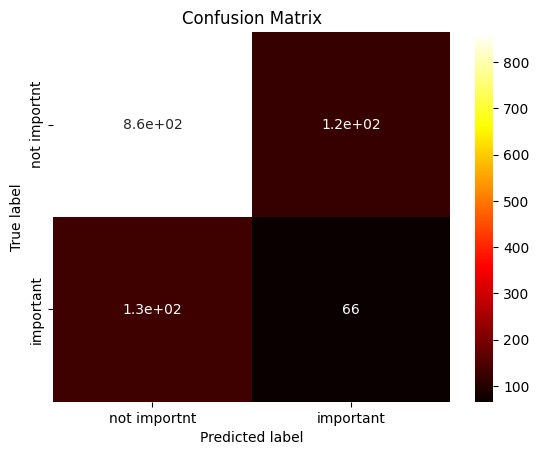

In [ ]:
random.seed(12345)
dt_tfidf = tree.DecisionTreeClassifier(class_weight={0: 0.63, 1: 2.3}, criterion='gini', max_depth=3, splitter='best')
dt_tfidf.fit(X_train_tfidf, y_train_tfidf)
predictions_dt_tfidf = dt_tfidf.predict(X_test_tfidf)
print_evaluation(y_test_tfidf, predictions_dt_tfidf)

##  bow

In [ ]:
dt_grid.fit(X_train_bow,y_train_bow)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END class_weight={0: 0.15, 1: 1}, criterion=gini, max_depth=1, splitter=best;, score=0.277 total time=   7.6s
[CV 2/5] END class_weight={0: 0.15, 1: 1}, criterion=gini, max_depth=1, splitter=best;, score=0.265 total time=   8.4s
[CV 3/5] END class_weight={0: 0.15, 1: 1}, criterion=gini, max_depth=1, splitter=best;, score=0.295 total time=   7.5s
[CV 4/5] END class_weight={0: 0.15, 1: 1}, criterion=gini, max_depth=1, splitter=best;, score=0.279 total time=   7.9s
[CV 5/5] END class_weight={0: 0.15, 1: 1}, criterion=gini, max_depth=1, splitter=best;, score=0.260 total time=   8.3s
[CV 1/5] END class_weight={0: 0.15, 1: 1}, criterion=gini, max_depth=1, splitter=random;, score=0.248 total time=   7.2s
[CV 2/5] END class_weight={0: 0.15, 1: 1}, criterion=gini, max_depth=1, splitter=random;, score=0.265 total time=   8.3s
[CV 3/5] END class_weight={0: 0.15, 1: 1}, criterion=gini, max_depth=1, splitter=random;, score=0.295

In [ ]:
dt_grid.best_params_

In [ ]:
dt_bow = tree.DecisionTreeClassifier(class_weight={0: 0.15, 1: 1}, criterion='gini', max_depth=3, splitter='best')
dt_bow.fit(X_train_bow, y_train_bow)
predictions_dt_bow = dt_bow.predict(X_test_bow)
print_evaluation(y_test_bow, predictions_dt_bow)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_param_grid = {'criterion': ['gini', 'entropy'],
                  'max_depth': [1,2,3],
                  'class_weight':[{0:0.15, 1:1},{0:0.3, 1:1},{0:0.2, 1:3},{0:0.15, 1:5}, {0:0.63, 1:2.3}]}
rf_grid = GridSearchCV(RandomForestClassifier(),
                        rf_param_grid,
                        refit=True,
                        verbose=3,
                        scoring='f1_macro')

## tf-idf

In [ ]:
rf_grid.fit(X_train_tfidf,y_train_tfidf)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END class_weight={0: 0.15, 1: 1}, criterion=gini, max_depth=1;, score=0.174 total time=   0.8s
[CV 2/5] END class_weight={0: 0.15, 1: 1}, criterion=gini, max_depth=1;, score=0.174 total time=   1.1s
[CV 3/5] END class_weight={0: 0.15, 1: 1}, criterion=gini, max_depth=1;, score=0.174 total time=   1.5s
[CV 4/5] END class_weight={0: 0.15, 1: 1}, criterion=gini, max_depth=1;, score=0.174 total time=   1.8s
[CV 5/5] END class_weight={0: 0.15, 1: 1}, criterion=gini, max_depth=1;, score=0.174 total time=   1.6s
[CV 1/5] END class_weight={0: 0.15, 1: 1}, criterion=gini, max_depth=2;, score=0.174 total time=   1.6s
[CV 2/5] END class_weight={0: 0.15, 1: 1}, criterion=gini, max_depth=2;, score=0.174 total time=   1.7s
[CV 3/5] END class_weight={0: 0.15, 1: 1}, criterion=gini, max_depth=2;, score=0.174 total time=   1.6s
[CV 4/5] END class_weight={0: 0.15, 1: 1}, criterion=gini, max_depth=2;, score=0.174 total time=   1.1s
[C

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': [{0: 0.15, 1: 1}, {0: 0.3, 1: 1},
                                          {0: 0.2, 1: 3}, {0: 0.15, 1: 5},
                                          {0: 0.63, 1: 2.3}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3]},
             scoring='f1_macro', verbose=3)

In [ ]:
rf_grid.best_params_

{'class_weight': {0: 0.63, 1: 2.3}, 'criterion': 'gini', 'max_depth': 3}

f1-score macro: 0.6298654217673392
f1-score micro: 0.8298052497883149
accuracy score: 0.8298052497883149
recall score: 0.6118926758520666
precision score: 0.6735267656320288
ROCAUC score: 0.6118926758520666


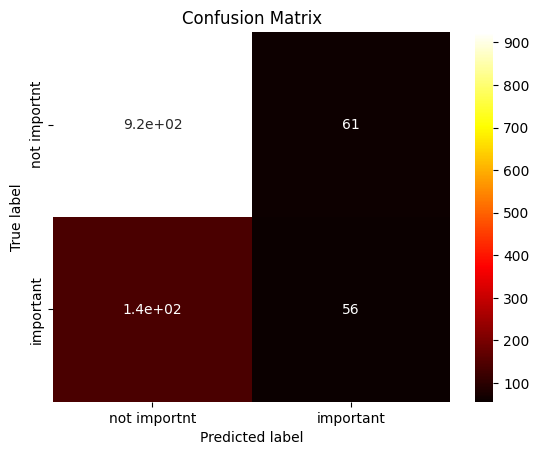

In [ ]:

rf_tfidf = RandomForestClassifier(class_weight={0: 0.63, 1: 2.3}, criterion='gini', max_depth=3) #
rf_tfidf.fit(X_train_tfidf, y_train_tfidf)
predictions_rf_tfidf = rf_tfidf.predict(X_test_tfidf)
print_evaluation(y_test_tfidf, predictions_rf_tfidf)

## bow

In [ ]:
rf_grid.fit(X_train_bow,y_train_bow)

In [ ]:
rf_grid.best_params_

In [ ]:
rf_bow = RandomForestClassifier(class_weight={0: 0.3, 1: 1}, criterion='gini', max_depth=1)#
rf_bow.fit(X_train_bow, y_train_bow)
predictions_rf_bow = rf_bow.predict(X_test_bow)
print_evaluation(y_test_bow, predictions_rf_bow)